In [113]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import hypernetx.algorithms.hypergraph_modularity as hmod
import pandas as pd
import igraph as ig
import hypernetx as hnx
import statistics
import itertools

import warnings
warnings.simplefilter(action='ignore')

In [2]:
## stratify by chromosome first

dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_poreC_explore/'
readConcatemersWClosestGene = f'{dataDir}fragFile_sorted_wClosestGene.bed.gz'
colnames = ["chr","start","end","readID","geneChr","geneStart","geneEnd","strand","geneID","bioType","geneName","dist"]

fullBed = pd.read_csv(readConcatemersWClosestGene,sep = "\t",names = colnames)

In [5]:
chrIncDF = pd.pivot_table(data=fullBed[['readID', 'chr']], index='chr', columns='readID', aggfunc=lambda x: 1, fill_value=0)
chrIncDF.drop("chrM",inplace = True)
chrIncDF.shape

(24, 1669976)

In [6]:
colSums_chrIncDF = chrIncDF.sum()
interChrom = chrIncDF.loc[:, colSums_chrIncDF >=3]
interChrom.shape
interChrom.to_csv('interChrom_hnx.tab',sep = "\t")

(24, 204463)

In [129]:
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_poreC_explore/'
interChrom = pd.read_csv('interChrom_hnx.tab',sep = "\t")
interChrom.set_index('chr',inplace = True)

In [137]:
interChrom.head()

,Read:1000061_Card:3,Read:1000090_Card:4,Read:1000193_Card:5,Read:1000216_Card:3,Read:1000384_Card:4,Read:1000393_Card:6,Read:100039_Card:9,Read:1000427_Card:4,Read:1000803_Card:3,Read:1001015_Card:4,...,Read:999159_Card:5,Read:999325_Card:3,Read:999425_Card:5,Read:999497_Card:6,Read:99949_Card:4,Read:999532_Card:4,Read:99959_Card:4,Read:999615_Card:6,Read:999807_Card:3,Read:999981_Card:3
chr,,,,,,,,,,,,,,,,,,,,,
chr1,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
chr10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
chr11,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr12,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
chr13,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
ic_full = hnx.Hypergraph.from_incidence_dataframe(interChrom)

In [5]:
print(ic_full.number_of_nodes())
print(ic_full.number_of_edges())

24
204464


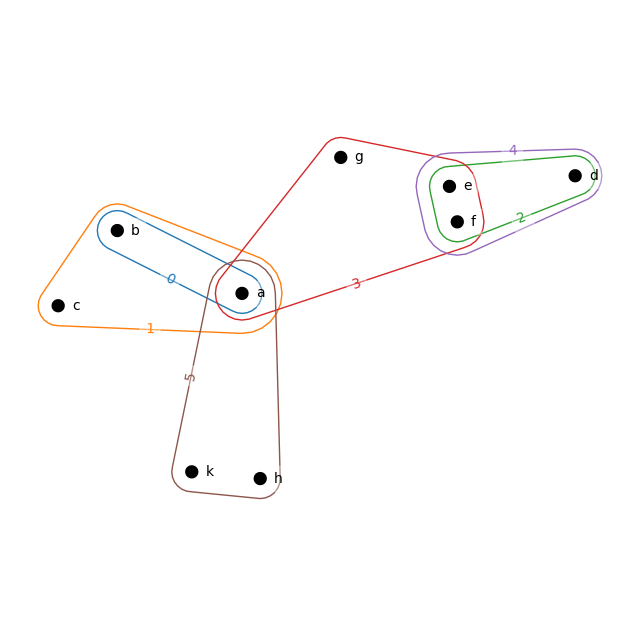

In [16]:
playDF = {
    0: ('a', 'b'),
    1: ('a', 'b','c'),
    2: ('d', 'e', 'f'),
    3: ('e', 'a', 'f', 'g'),
    4: ('d', 'e', 'f'),
    5: ('h', 'k', 'a')
}

H = hnx.Hypergraph(playDF)
hnx.draw(H)

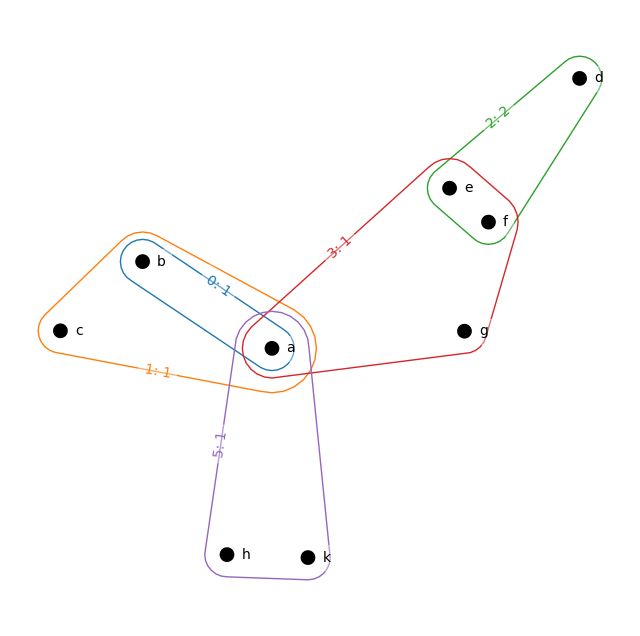

In [20]:
HC = H.collapse_edges(use_reps = True, return_counts = True)
hnx.draw(HC)

In [24]:
[n for n in HC.nodes()], [e for e in HC.edges()]

(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k'],
 ['0: 1', '1: 1', '2: 2', '3: 1', '5: 1'])

In [29]:
edgeCounts = [e for e in HC.edges()]
data_dict = {}
for item in edgeCounts:
    key, value = item.split(':')
    data_dict[int(key)] = int(value)

# Extract the values as a numerical list
values = list(data_dict.values())

# Calculate the summary statistics
summary = {
    'min': min(values),
    'max': max(values),
    'mean': statistics.mean(values),
    'median': statistics.median(values),
    'standard_deviation': statistics.stdev(values)
}

In [30]:
print("Numerical List:", values)
print("Summary Statistics:", summary)

Numerical List: [1, 1, 2, 1, 1]
Summary Statistics: {'min': 1, 'max': 2, 'mean': 1.2, 'median': 1, 'standard_deviation': 0.4472135954999579}


In [25]:
ic_multiedge = ic_full.collapse_edges(use_reps = True, return_counts = True)

In [26]:
print(ic_multiedge.number_of_nodes())
print(ic_multiedge.number_of_edges())

24
31743


In [43]:
read_readCounts = [e for e in ic_multiedge.edges()]

data_dict = {}
for item in read_readCounts:
    key, value = item.split(': ')
    data_dict[key] = int(value)

# Extract the values as a numerical list
readCounts = list(data_dict.values())

# Calculate the summary statistics
summary_rc = {
    'min': min(readCounts),
    'max': max(readCounts),
    'mean': statistics.mean(readCounts),
    'median': statistics.median(readCounts),
    'standard_deviation': statistics.stdev(readCounts)
}

In [44]:
summary_rc

{'min': 1,
 'max': 397,
 'mean': 6.441231137573638,
 'median': 1,
 'standard_deviation': 22.025550743082636}

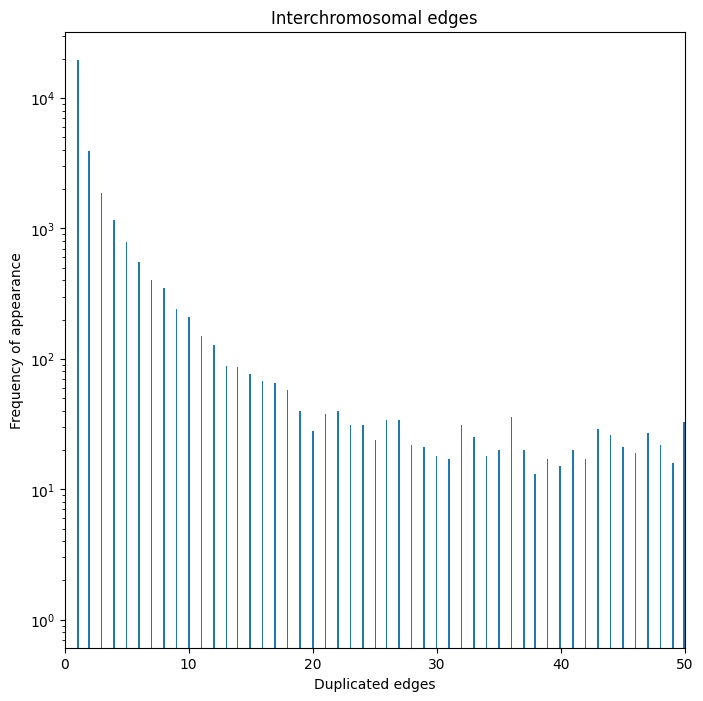

In [53]:

# Generate a histogram
plt.hist(readCounts, bins='auto')

plt.xlim(xmin=0, xmax=50)
plt.yscale('log')

# Add labels and title
plt.xlabel('Duplicated edges')
plt.ylabel('Frequency of appearance')
plt.title('Interchromosomal edges')

# Display the histogram
plt.show()

In [86]:
ic_multiedge_incidence = pd.DataFrame(ic_multiedge.incidence_matrix().todense())

In [87]:
colsums_reducedDF = ic_multiedge_incidence.sum(axis = 0).tolist()
min(colsums_reducedDF), max(colsums_reducedDF),statistics.mean(colsums_reducedDF), statistics.median(colsums_reducedDF)

(3, 24, 5.302460384966764, 5)

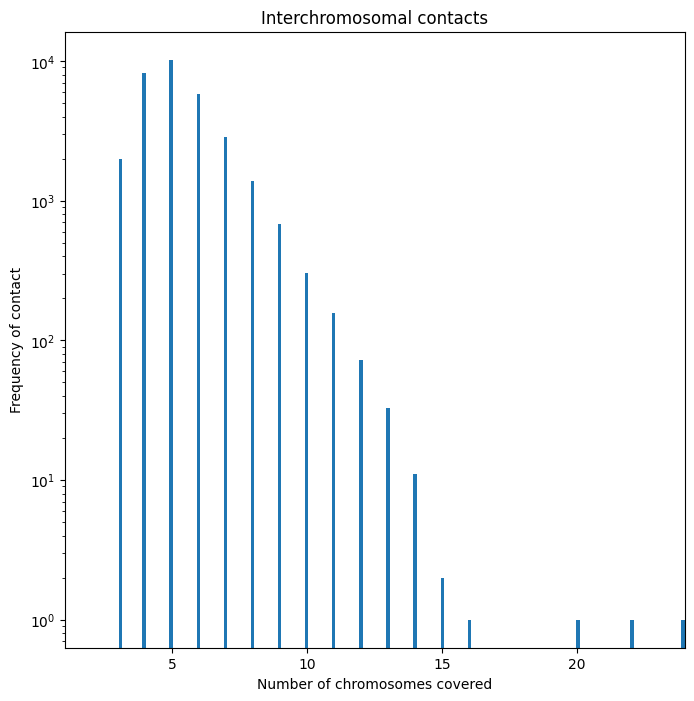

In [78]:
# Generate a histogram
plt.hist(colsums_reducedDF, bins='auto')

plt.xlim(xmin=1, xmax=24)
plt.yscale('log')

# Add labels and title
plt.xlabel('Number of chromosomes covered')
plt.ylabel('Frequency of contact')
plt.title('Interchromosomal contacts')

# Display the histogram
plt.show()

In [109]:
ic_multiedge_incidence.loc[:,ic_multiedge_incidence.sum() >20]


,31560,31742
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [111]:
ic_multiedge.edges()

In [136]:
i = 31560
next(itertools.islice(ic_multiedge.edges(), i, i+1))

'Read:47898_Card:138: 1'

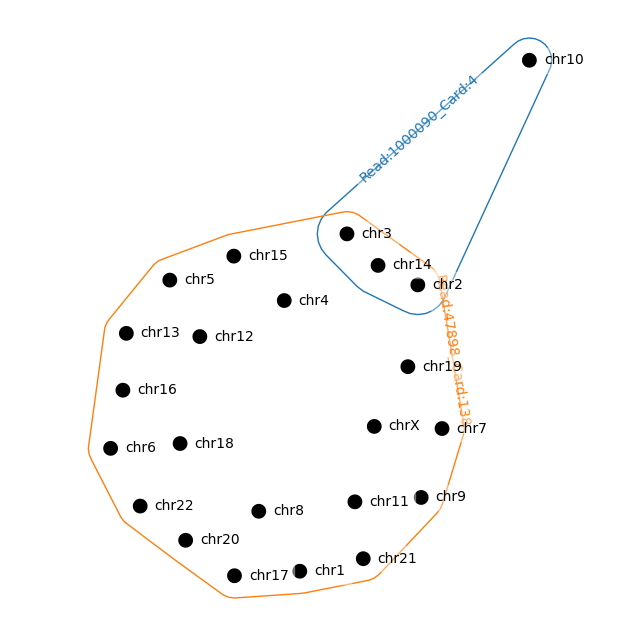

In [139]:
WR = interChrom[['Read:47898_Card:138','Read:1000090_Card:4']]
hWR = hnx.Hypergraph.from_incidence_dataframe(WR)

hnx.draw(hWR)


# plt.subplots(figsize=(5,5))
# hnx.draw(ic_full.restrict_to_edges(['Read:47898_Card:138']))

In [27]:
ic_multiedge.is_connected(s=1), ic_multiedge.is_connected(s=2), ic_multiedge.is_connected(s=3), ic_multiedge.is_connected(s=4)

(True, True, True, True)

In [10]:
ic_full.degree('chr1',s = 1), ic_full.degree('chr1',s = 5), ic_full.degree('chr1',s = 10)

(55576, 11285, 383)

In [11]:
s_comp10 = ic_full.s_components(s = 10)

In [18]:
ic_full.distance("chr1","chr4",s = 12), ic_full.diameter()

(1, 1)

In [24]:
ic_full.adjacency_matrix(s=1000).todense()
ic_full.auxiliary_matrix(s=1000,index=True)

(<23x23 sparse matrix of type '<class 'numpy.int64'>'
 	with 504 stored elements in Compressed Sparse Row format>,
 array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
        'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
        'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
        'chrX'], dtype=object))

In [26]:
fig,ax = plt.subplots(1,3,figsize=(15,6))
A = dict()
g = dict()
for i in range(1,4):
    A[i],names = ic_full.edge_adjacency_matrix(s=i,index=True)
    A[i] = A[i].todense()
    g[i] = H.get_linegraph(s=i)  ## corresponding line graph
    ax[i-1].set_title(f's={i}')
    nx.draw(g[i],ax=ax[i-1],with_labels=True, node_color='cyan');

: 

: 